In [1]:
import pandas as pd

nombre_columnas = ['E (eV)','P(E) (1/eV)']
df_U235 = pd.read_csv('chspect_UF4_nconv_v2.dat', sep='\s+', header=None, names=nombre_columnas)

df_U235 = df_U235[(df_U235['E (eV)']> 4.13E6) & (df_U235['E (eV)']< 4.607E6)]
df_U235 = df_U235[df_U235['P(E) (1/eV)'] > 2.3867e-10]
df_U235.loc[:, 'P(E) (1/eV)'] *= 0.95

In [2]:
import plotly.express as px

# Asumiendo que df_U235 es tu DataFrame y ya está definido
fig = px.line(df_U235, x='E (eV)', y='P(E) (1/eV)', log_y=True, title='P(E) (1/eV) vs E (eV)')
fig.update_layout(xaxis_title='E (eV)', yaxis_title='P(E) (1/eV)', yaxis_tickformat='.5e', legend_title='Probability Density')
fig.show()

In [3]:
df_U234 = pd.read_csv('chspect-U234-v2.dat', sep='\s+', header=None, names=nombre_columnas)
df_U234 = df_U234[(df_U234['E (eV)'] >= 4.6875E6) & (df_U234['E (eV)'] <= 4.787E6)]
df_U234.loc[:, 'P(E) (1/eV)'] *= 0.05

df_U234= df_U234[df_U234['P(E) (1/eV)'] >= 2.3867E-10]

In [4]:
# Asumiendo que df_U235 es tu DataFrame y ya está definido
fig = px.line(df_U234, x='E (eV)', y='P(E) (1/eV)', log_y=True, title='P(E) (1/eV) vs E (eV)')
fig.update_layout(xaxis_title='E (eV)', yaxis_title='P(E) (1/eV)', yaxis_tickformat='.5e', legend_title='Probability Density')
fig.show()

In [5]:
df_U = pd.concat([df_U235, df_U234], ignore_index=True)

In [6]:
fig = px.scatter(df_U, x='E (eV)', y='P(E) (1/eV)', title='Probability Density vs Deposited Energy', log_y=True, width=800, height=500)
fig.update_layout(xaxis_title='E (eV)', yaxis_title='P(E) (1/eV)', yaxis_tickformat='.5e', legend_title='Probability Density')
fig.show()

In [7]:
df_exp = pd.read_csv("Exp_U235.csv", sep=";")
df_exp = df_exp[['Suma']]

# Definir el rango deseado en el eje X
inicio = 5520
fin = 6400

# Filtrar el DataFrame para incluir solo las filas dentro del rango
df_exp = df_exp[(df_exp.index >= inicio) & (df_exp.index <= fin)].reset_index(drop=True)

# Graficar Suma en un eje X separado
fig = px.line(df_exp, x=df_exp.index, y='Suma', log_y=True, title='Experimento')
fig.update_layout(xaxis_title='Index', yaxis_title='Suma', yaxis_tickformat='.5e', legend_title='Probability Density')
fig.show()

In [97]:
from scipy.signal import find_peaks
import numpy as np

height_max_exp = np.percentile(df_exp['Suma'],90)
height_max_th = np.percentile(df_U['P(E) (1/eV)'],85)

peaks_th, _ = find_peaks(df_U['P(E) (1/eV)'], height=height_max_th)
peaks_exp, _ = find_peaks(df_exp['Suma'], height= height_max_exp)

if len(peaks_th) > 0:

    index_first_peak = peaks_th[0]
    y0_th = df_U.iloc[index_first_peak]['P(E) (1/eV)']
    x0_th = df_U.iloc[index_first_peak]['E (eV)']

    index_last_peak = peaks_th[-1]
    yf_th = df_U.iloc[index_last_peak]['P(E) (1/eV)']
    xf_th = df_U.iloc[index_last_peak]['E (eV)']

if len(peaks_exp)>0:
    index_first_peak = peaks_exp[0]
    y0_exp = df_exp.iloc[index_first_peak]['Suma']
    x0_exp = index_first_peak

    index_last_peak = peaks_exp[-1]
    yf_exp = df_exp.iloc[index_last_peak]['Suma']
    xf_exp = index_last_peak

my = (yf_th-y0_th)/(yf_exp-y0_exp)
by = yf_th - my*yf_exp


fitting_by = 0.87E-8
fitting_my = 0
df_exp['P(E) (1/eV) Predicted'] = (by+fitting_by) + (my+fitting_my)*df_exp['Suma']


mx = (xf_th-x0_th)/(xf_exp-x0_exp)
bx = x0_th - mx*x0_exp

fitting_bx = 10
fitting_mx = 2
df_exp['E (eV) Predicted'] = (bx+fitting_bx)  + (mx+fitting_mx)*df_exp.index

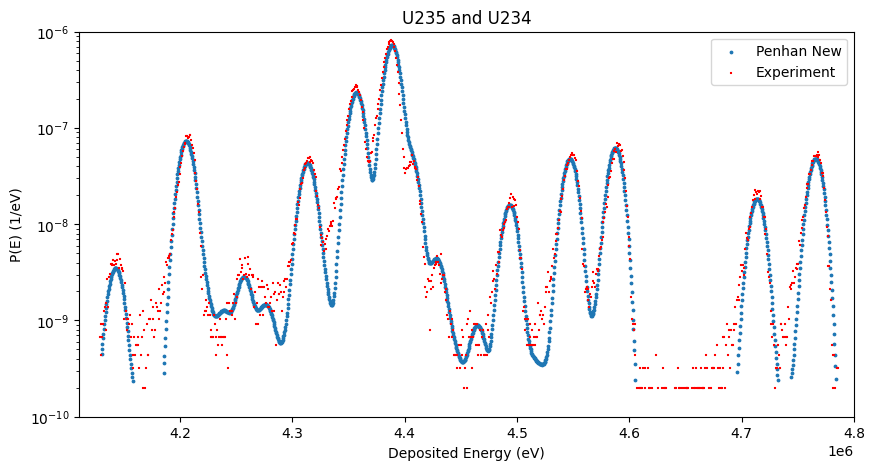

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(df_U['E (eV)'],
            df_U['P(E) (1/eV)'], s= 3,
            marker ='o', label='Penhan New')
plt.scatter(df_exp['E (eV) Predicted'],
            df_exp['P(E) (1/eV) Predicted'], s= 4, marker='+',
            color='red', label='Experiment')
plt.title('U235 and U234')
plt.xlabel('Deposited Energy (eV)')
plt.ylabel('P(E) (1/eV)')
plt.yscale('log')
plt.axis([4.11E6, 4.8E6, 1E-10, 1E-6])
plt.legend()
plt.show()